<a href="https://colab.research.google.com/github/Raphaelgsousa/apex-anteapex-gaiadr3/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inicialização

In [1]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 5.2 MB/s 
     |████████████████████████████████| 832 kB 64.6 MB/s 
     |████████████████████████████████| 48 kB 5.0 MB/s 
     |████████████████████████████████| 4.0 MB 48.7 MB/s 


In [2]:
pip install pyodbc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 280 kB 5.1 MB/s 
  Created wheel for pyodbc: filename=pyodbc-4.0.32-cp37-cp37m-linux_x86_64.whl size=287313 sha256=cae00aed351e1f6f192da5d1ed676778ca8e46712a2b4cb55eb2c895092580a2
  Stored in directory: /root/.cache/pip/wheels/2e/9c/da/8652fd42e0f662015554f00a9e96fe4f438dfd1ef59787879e
Successfully built pyodbc


In [3]:
import astropy.coordinates as coord
import astropy.coordinates as SkyCoord
import astropy.units as u
import pandas as pd
import io
from google.colab import files
from google.colab import drive
from astropy.io import fits
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier
from matplotlib import pyplot as plt
from matplotlib import quiver
import numpy as np
import os
import glob
import statistics



#Criando tabelas de Dados
Utilizando uma pesquisa na linguagem SQL para criar tabela de dados baixados do catálogo do gaia DR3.

Rodando perfeitamente gerando os dados em um range de l = 0,360 e b = -90,90


In [4]:
for l in range(0, 370, 10):
  for b in range(-90, 100, 10):
    while l in range(0, 370, 10):
      string=("SELECT pm, ra, dec, pmdec, pmra, l, b, parallax, \
((1/cos(b*3.141592654/180))*(-pmra*cos(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)*sin(ra-192.85833333*3.141592654/180)+pmdec*(sin(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)-cos(27.12833333*3.141592654/180)*sin(dec*3.141592654/180)*cos(ra-192.85833333*3.141592654/180)) )) as pmb, \
(1/(cos(b*3.141592654/180)*cos(l*3.141592654/180-122.93193212*3.141592654/180)))*( sin(dec*3.141592654/180)*sin(ra-192.85833333*3.141592654/180)*pmdec - cos(dec*3.141592654/180)*cos(ra-192.85833333*3.141592654/180)*pmra +sin(b*3.141592654/180)*sin(l*3.141592654/180-122.93193212*3.141592654/180)*(1/cos(b*3.141592654/180))*( -pmra*cos(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)*sin(ra-192.85833333*3.141592654/180)+pmdec*(sin(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)-cos(27.12833333*3.141592654/180)*sin(dec*3.141592654/180)*cos(ra-192.85833333*3.141592654/180)) ) ) as pml, \
sqrt((((1/cos(b*3.141592654/180))*(-pmra*cos(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)*sin(ra-192.85833333*3.141592654/180)+pmdec*(sin(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)-cos(27.12833333*3.141592654/180)*sin(dec*3.141592654/180)*cos(ra-192.85833333*3.141592654/180)) ))*((1/cos(b*3.141592654/180))*(-pmra*cos(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)*sin(ra-192.85833333*3.141592654/180)+pmdec*(sin(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)-cos(27.12833333*3.141592654/180)*sin(dec*3.141592654/180)*cos(ra-192.85833333*3.141592654/180)) ))) + ((1/(cos(b*3.141592654/180)*cos(l*3.141592654/180-122.93193212*3.141592654/180)))*( sin(dec*3.141592654/180)*sin(ra-192.85833333*3.141592654/180)*pmdec - cos(dec*3.141592654/180)*cos(ra-192.85833333*3.141592654/180)*pmra +sin(b*3.141592654/180)*sin(l*3.141592654/180-122.93193212*3.141592654/180)*(1/cos(b*3.141592654/180))*( -pmra*cos(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)*sin(ra-192.85833333*3.141592654/180)+pmdec*(sin(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)-cos(27.12833333*3.141592654/180)*sin(dec*3.141592654/180)*cos(ra-192.85833333*3.141592654/180)) ) )*(1/(cos(b*3.141592654/180)*cos(l*3.141592654/180-122.93193212*3.141592654/180)))*( sin(dec*3.141592654/180)*sin(ra-192.85833333*3.141592654/180)*pmdec - cos(dec*3.141592654/180)*cos(ra-192.85833333*3.141592654/180)*pmra +sin(b*3.141592654/180)*sin(l*3.141592654/180-122.93193212*3.141592654/180)*(1/cos(b*3.141592654/180))*( -pmra*cos(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)*sin(ra-192.85833333*3.141592654/180)+pmdec*(sin(27.12833333*3.141592654/180)*cos(dec*3.141592654/180)-cos(27.12833333*3.141592654/180)*sin(dec*3.141592654/180)*cos(ra-192.85833333*3.141592654/180)) ) ))) as pm_gal \
FROM gaiadr3.gaia_source \
   WHERE parallax > 6 \
      AND parallax < 10 \
      AND pmdec IS NOT NULL \
      AND pmra IS NOT NULL \
      AND 1=CONTAINS(POINT(l, b), \
                   CIRCLE(%s, %d, 1 ))" % ( l, b))
      name = "%s-%d.csv" % ( l, b)
      namescsv = "%s-%d" % ( l, b)
      vect = [l,b]
      print(vect)
      #print(string)
      #print(l,b)
      r1 = Gaia.launch_job(string,output_file=name,dump_to_file=True, output_format='csv')
      #print(r1.outputFile)
      r1.get_results()
      if l <= 360:
        break

[0, -90]
[0, -80]
[0, -70]
[0, -60]
[0, -50]
[0, -40]
[0, -30]
[0, -20]
[0, -10]
[0, 0]
[0, 10]
[0, 20]
[0, 30]
[0, 40]
[0, 50]
[0, 60]
[0, 70]
[0, 80]
[0, 90]
[10, -90]
[10, -80]
[10, -70]
[10, -60]
[10, -50]
[10, -40]
[10, -30]
[10, -20]
[10, -10]
[10, 0]
[10, 10]
[10, 20]
[10, 30]
[10, 40]
[10, 50]
[10, 60]
[10, 70]
[10, 80]
[10, 90]
[20, -90]
[20, -80]
[20, -70]
[20, -60]
[20, -50]
[20, -40]
[20, -30]
[20, -20]
[20, -10]
[20, 0]
[20, 10]
[20, 20]
[20, 30]
[20, 40]
[20, 50]
[20, 60]
[20, 70]
[20, 80]
[20, 90]
[30, -90]
[30, -80]
[30, -70]
[30, -60]
[30, -50]
[30, -40]
[30, -30]
[30, -20]
[30, -10]
[30, 0]
[30, 10]
[30, 20]
[30, 30]
[30, 40]
[30, 50]
[30, 60]
[30, 70]
[30, 80]
[30, 90]
[40, -90]
[40, -80]
[40, -70]
[40, -60]
[40, -50]
[40, -40]
[40, -30]
[40, -20]
[40, -10]
[40, 0]
[40, 10]
[40, 20]
[40, 30]
[40, 40]
[40, 50]
[40, 60]
[40, 70]
[40, 80]
[40, 90]
[50, -90]
[50, -80]
[50, -70]
[50, -60]
[50, -50]
[50, -40]
[50, -30]
[50, -20]
[50, -10]
[50, 0]
[50, 10]
[50, 20]
[50, 30]

Agora antes de juntar os csv em um único arquivo, devemos calcular o vetor movimento próprio resultante entre l e b.

Juntando as tabelas geradas através da pesquisa Gaia.launch_job em uma unica tabela.

In [5]:
path = '/content/'

In [6]:
os.chdir(path)
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [7]:
#combinar todos os arquivos da lista
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#exportar para csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [8]:
tabeladados = pd.read_csv('combined_csv.csv')


Como transformar essa tabela em dataframe?

#Plotando Gráfico
Plot do gráfico do tipo x e y em coordenadas galácticas (apenas para verificação se os dados estão batendo).
*(Eu apenas sei plotar gráfico do tipo scatter, não sei como fazer um plot do tipo arrow para colocar como direção do vetor o movimento próprio.)*

<Figure size 648x1152 with 0 Axes>

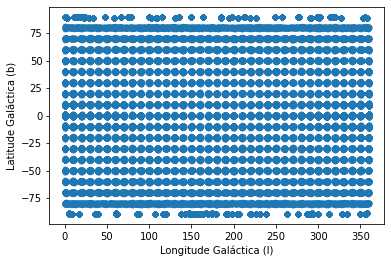

<Figure size 648x1152 with 0 Axes>

In [9]:
tabeladados.plot('l','b',kind = 'scatter')
plt.xlabel('Longitude Galáctica (l)')
plt.ylabel('Latitude Galáctica (b)')
plt.figure (figsize = (9, 16)) 

Agora o que deve ser feito é um plot em forma de arrow utilizando os movimentos próprios e coordenadas l e b.